In [2]:
%matplotlib inline
import collections
import glob
import os
from matplotlib import pyplot as plt
from telicity.util import io
import seaborn as sns
import numpy as np
import pandas as pd

base_in_path = '/Users/shahab/gitlab/telicity/telicity/experiments/resources/analysis/'
base_out_path = '/Users/shahab/gitlab/telicity/telicity/experiments/resources/analysis/fa_experiments_analysis/'


### Create Heatmap from confusion matrix

_Note: In the confusion matrix, rows correspond to the **true** label and columns to the **predicted** label_

lr_fa/farsi-caption_and_wikipedia/confusion_matrix*.dill [225 116 120]
lr_fa/farsi-caption_and_wikipedia/confusion_matrix*.dill [225 116 120]


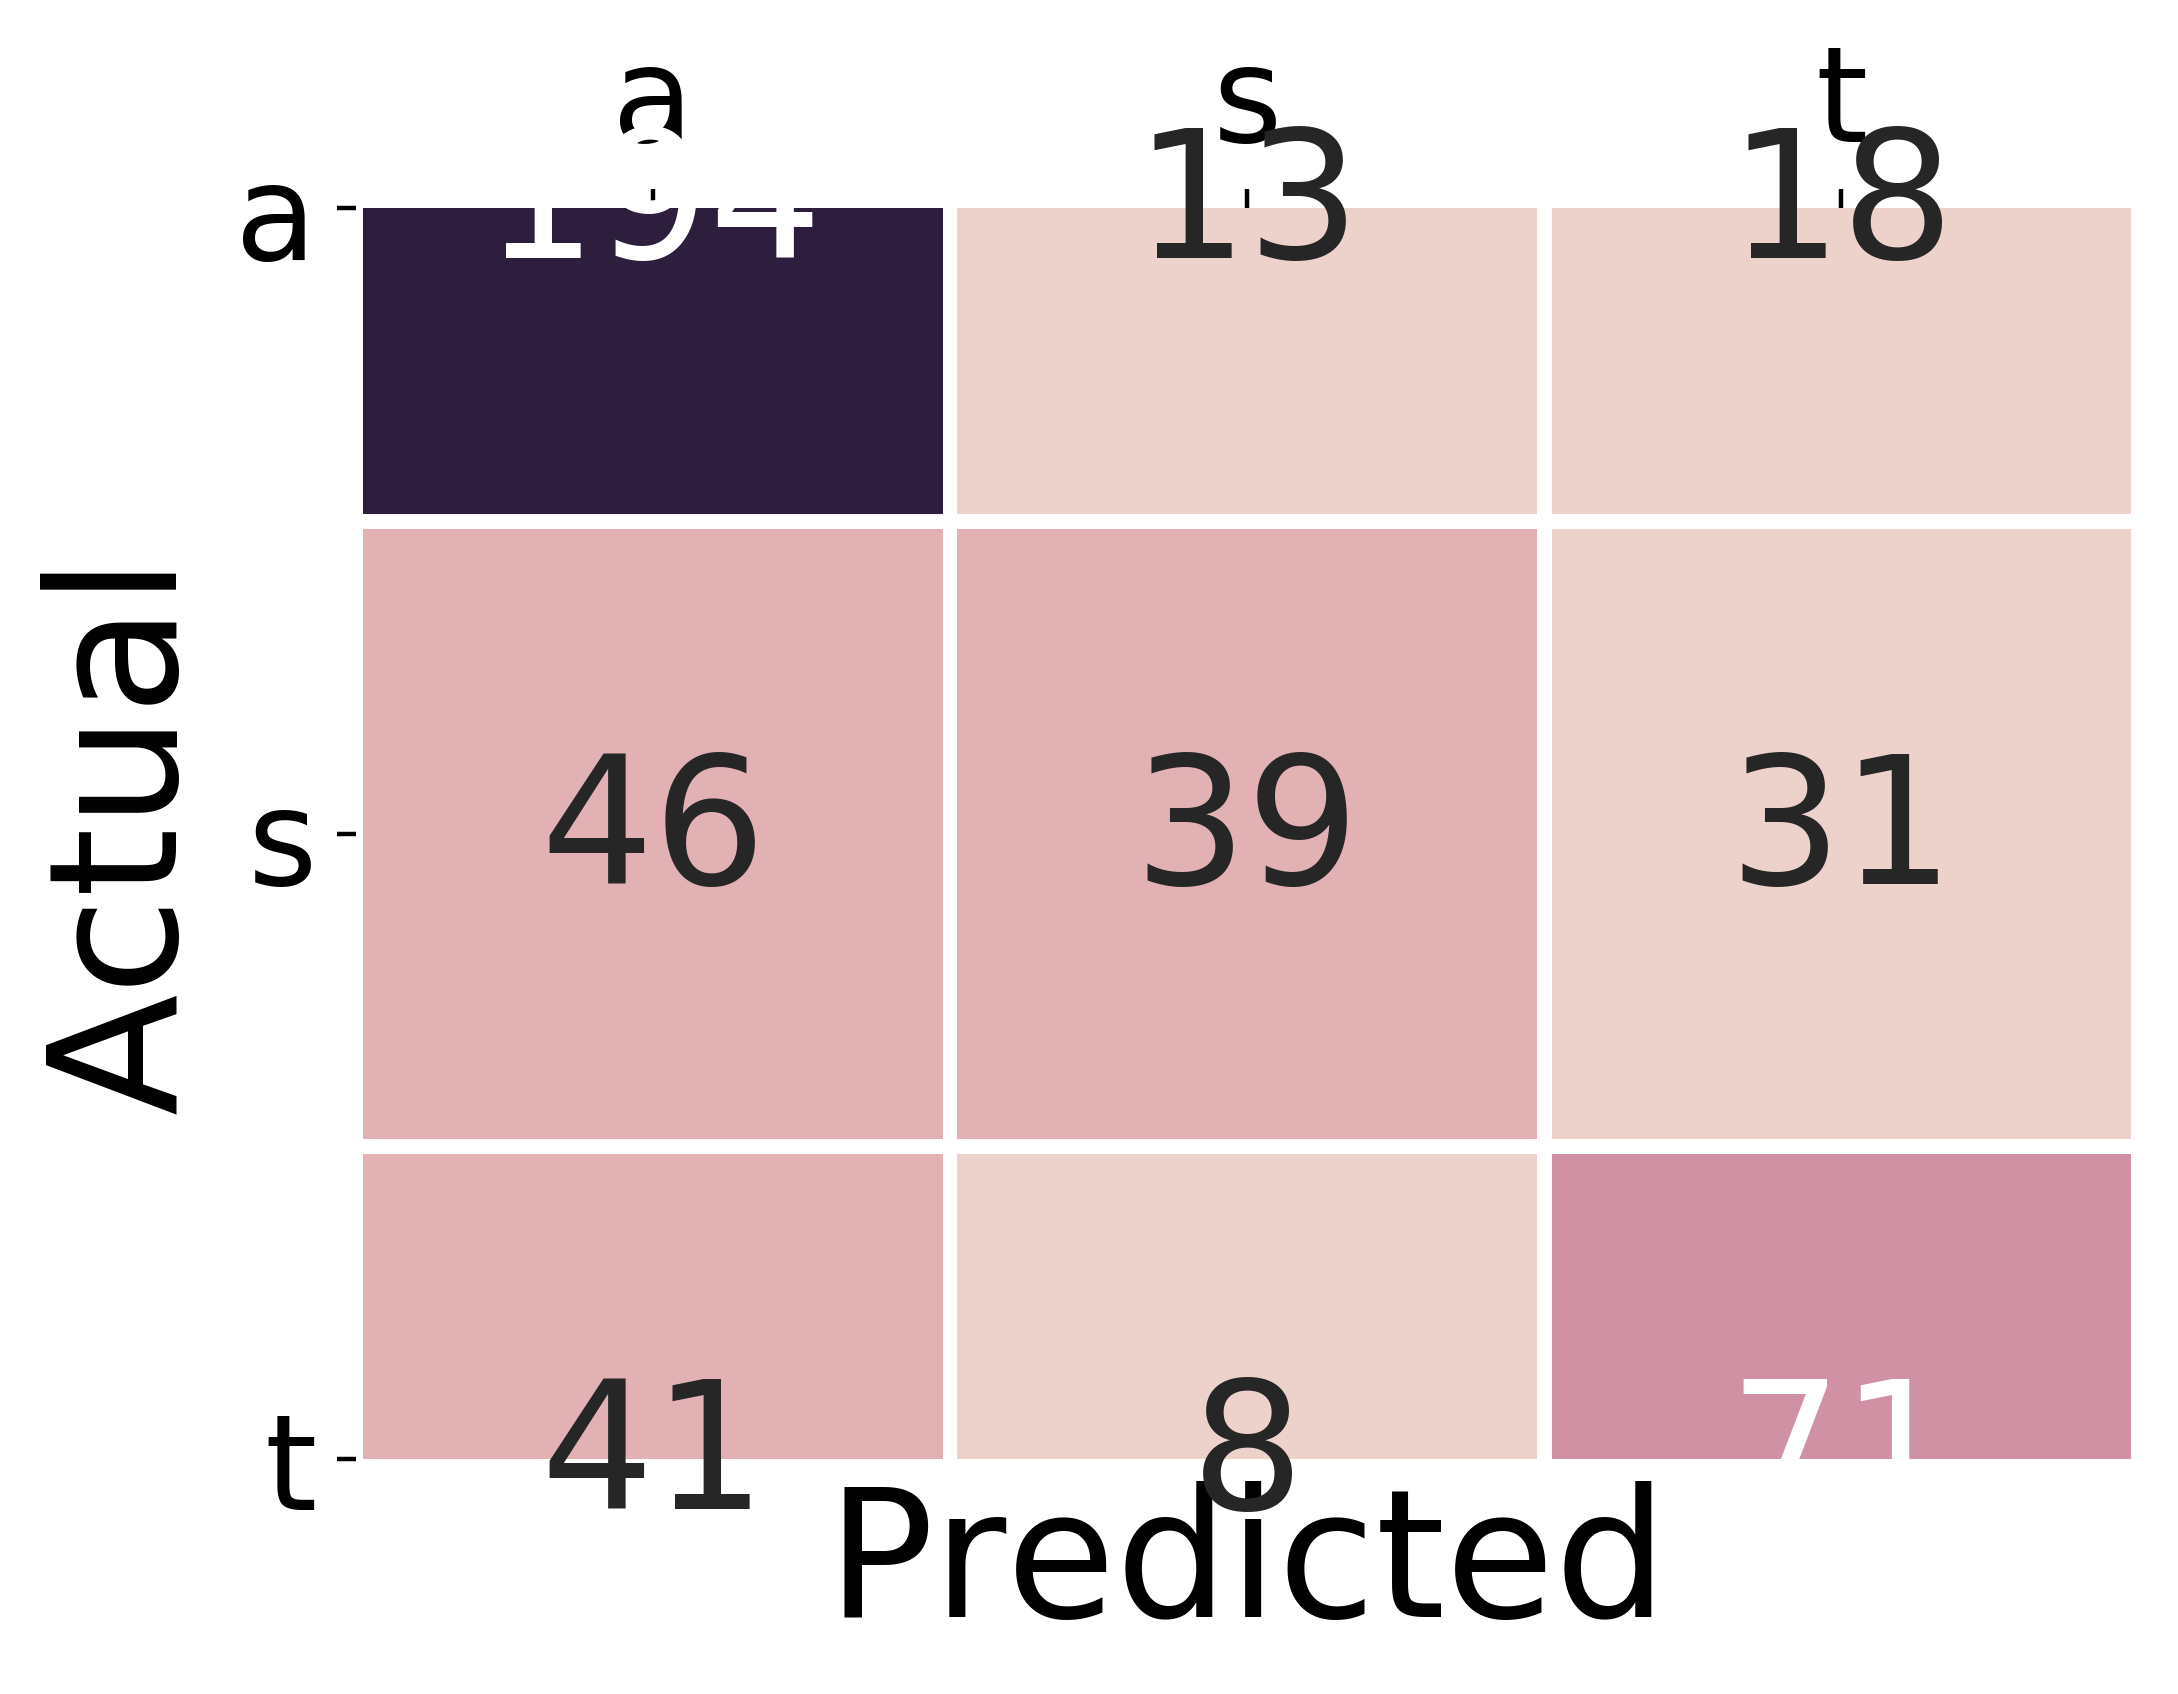

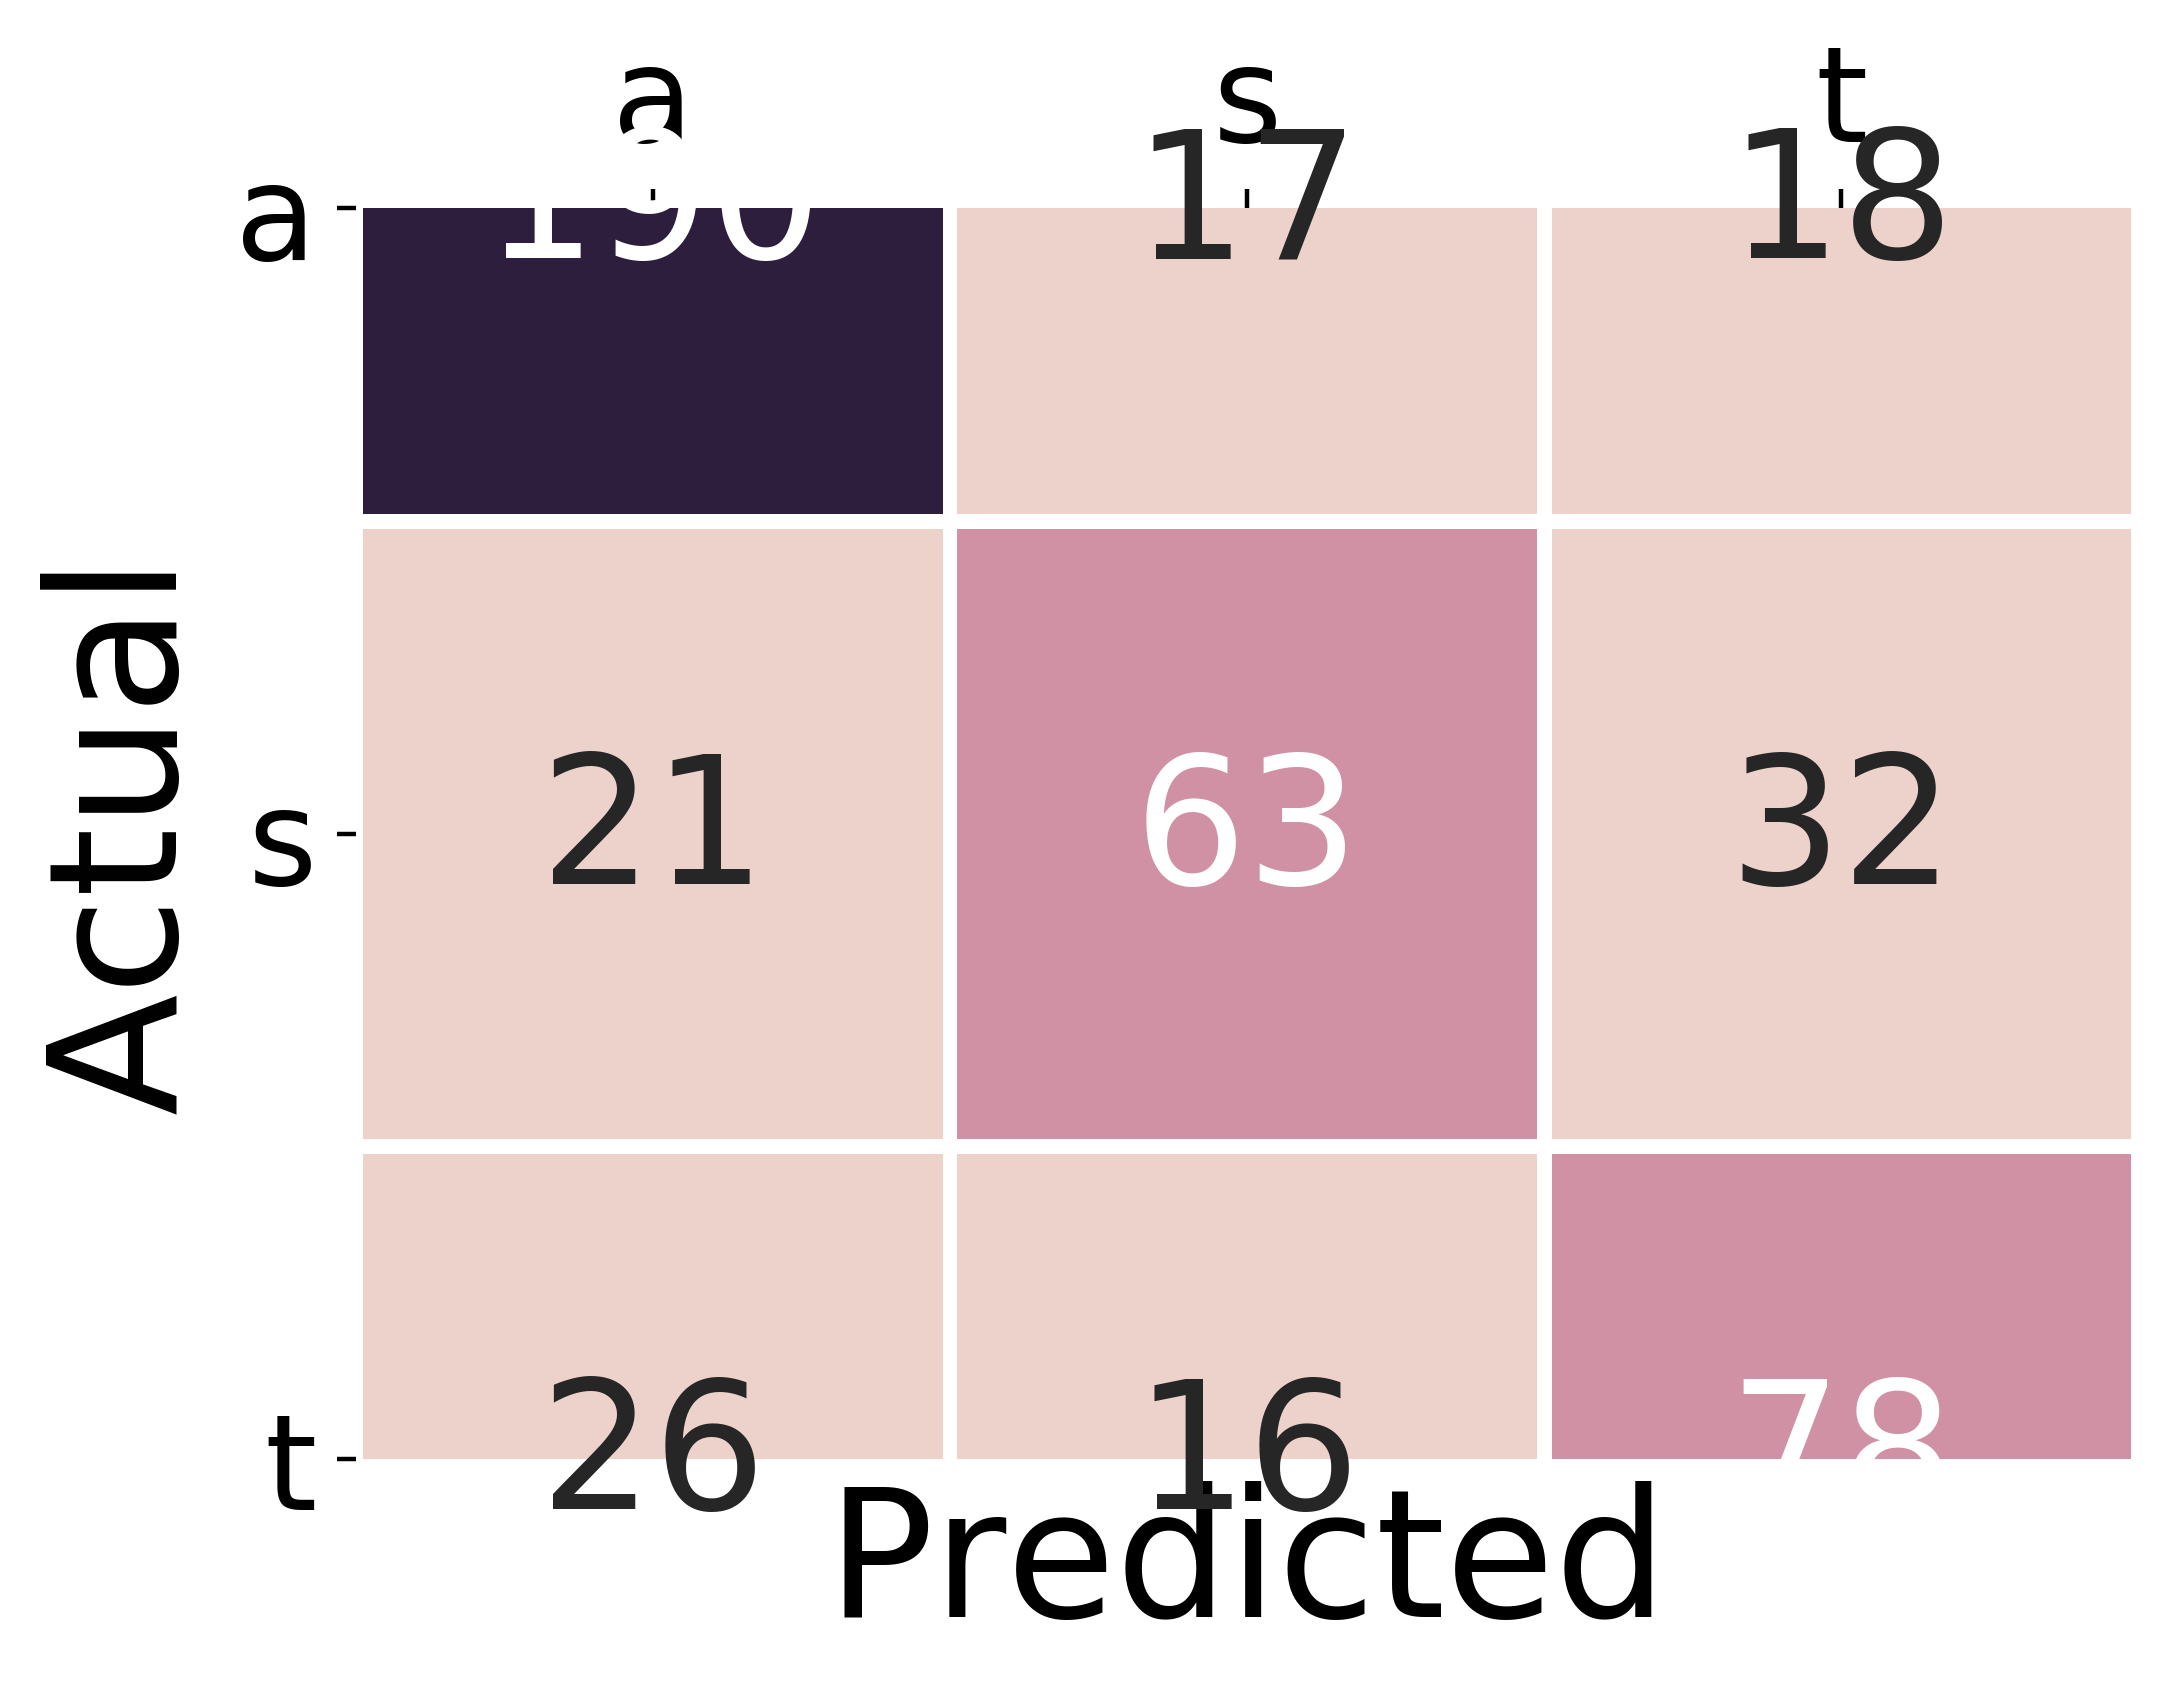

In [122]:

# experiment_info = 'lr_fa/farsi-caption/confusion_matrix*.dill'
# experiment_info = 'lr_fa/farsi-wikipedia/confusion_matrix*.dill'
experiment_info = 'lr_fa/farsi-caption_and_wikipedia/confusion_matrix*.dill'

for cm_file in glob.glob(os.path.join(base_in_path, experiment_info)):

    plot_file_name = os.path.split(cm_file)[1].replace('dill', 'png')
    cm_wrapped = io.load_structured_resource(cm_file)
    
    # Create pandas DataFrame from the confusion matrix data
    cm_columns = cm_wrapped['labels']
    cm_data = cm_wrapped['data']
    cm = {}
    for idx, col in enumerate(cm_columns):
        cm[col] = cm_data[idx]
    df_cm = pd.DataFrame.from_dict(cm, orient='index', columns=cm_columns)
    
    print(experiment_info , sum(df_cm.values.T))
    
    class_size = sum(df_cm.values.T)
    
#     Plot the confusion matrix as Heatmap
    fig = plt.figure(figsize=(5.75, 4.14), dpi=400, facecolor='w', edgecolor='k')
#     fig = plt.figure(figsize=(3, 3), dpi=100, edgecolor='w')
    
    midpoint = (df_cm.values.max() - df_cm.values.min()) / 2
    ax = sns.heatmap(df_cm, annot=True, linewidths=2.5, fmt='d', cmap=sns.cubehelix_palette(8), annot_kws={'fontdict': {'size': 32}}, cbar=False)
#     ax = sns.heatmap(df_cm, annot=True, linewidths=.5, fmt='d',center=midpoint, vmin=0, vmax=10, cmap=sns.cubehelix_palette(8), cbar=False,annot_kws={'fontdict': {'size': 25}},)
    
    ax.xaxis.set_ticks_position('top')
    ax.set_xlabel('Predicted', fontsize=32)
    ax.set_ylabel('Actual', fontsize=32)
    ax.set_xticklabels(ax.get_xticklabels(), size=24)
    ax.set_yticklabels(ax.get_yticklabels(), size=24, rotation=0)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticklabels(ax.get_xticklabels())
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    
    plt.savefig(os.path.join(base_out_path, plot_file_name), bbox_inches='tight') 

In [120]:
# class_size = '185  61  11'
f1 = '0.77  0.44  0.59'

# class_size = np.array(class_size.split()).astype(np.int)
f1 = np.array(f1.split()).astype(np.float)

np.dot(class_size, f1)/sum(class_size)

0.6401084598698481

In [72]:
recall = 76/(96)
precis = 76/(21+35+76)
f1 = 2*(recall * precis) / (recall + precis)
f1

0.6666666666666667

In [48]:
!  ls /Users/shahab/gitlab/telicity/telicity/experiments/resources/analysis/lr_fa/

farsi-caption               farsi-wikipedia
farsi-caption_and_wikipedia


In [76]:
df_cm.values.T

array([[180,  22,  11],
       [  5,  39,   0],
       [  0,   0,   0]])

In [87]:
sum(df_cm.values.T)

array([185,  61,  11])

In [114]:
! pip list | grep matplo

matplotlib           3.0.3              


In [116]:
! ls /Users/shahab/gitlab/telicity/requirements.txt

MANIFEST.in                farsi_experiments_results
README.md                  requirements.txt
arabic_data                setup.py
arabic_experiments_results telicity
farsi_data                 telicity.egg-info


In [117]:
! cat /Users/shahab/gitlab/telicity/requirements.txt

dataclasses>=0.6
dill>=0.2.8.2
h5py>=2.8.0
joblib>=0.11
matplotlib>=2.2.3
nltk>=3.3
numpy>=1.10.1
pandas>=0.23.1
sacred>=0.7.4
scikit-learn>=0.20.0
scipy>=1.0.0
seaborn>=0.8.1
tables>=3.4.4


In [123]:
!  pip install matplotlib=2.2.3

ERROR: Invalid requirement: 'matplotlib=2.2.3'
Hint: = is not a valid operator. Did you mean == ?
